# Import all libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.preprocessing import OneHotEncoder

# Import the files

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
df=pd.concat([train,test])

# Explring the data

In [3]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Loan ID
train.groupby(['Loan_ID']).size()
test.groupby(['Loan_ID']).size()




labelencoder = LabelEncoder()


In [5]:
test["Gender"]

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
362    Male
363    Male
364    Male
365    Male
366    Male
Name: Gender, Length: 367, dtype: object

In [6]:
# Gender
df.groupby(['Gender']).size()  #Male is more comum
# change null for male


test['Gender'].fillna('Male', inplace=True)
train['Gender'].fillna('Male', inplace=True)
df['Gender'].fillna('Male', inplace=True)


In [7]:

test["Gender"] = labelencoder.fit_transform(test["Gender"])
train["Gender"] = labelencoder.fit_transform(train["Gender"])
df["Gender"] = labelencoder.fit_transform(df["Gender"])

In [8]:
# Married

df.groupby(['Married']).size() #yes more comum
train["Married"].isnull().sum() #Have 3 null

train["Married"].fillna('Yes', inplace = True)
df["Married"].fillna('Yes', inplace = True)

test["Married"] = labelencoder.fit_transform(test["Married"])
train["Married"] = labelencoder.fit_transform(train["Married"])
df["Married"] = labelencoder.fit_transform(df["Married"])



In [9]:
#Dependent
df.groupby(["Dependents"]).size() #0 more comum
df["Dependents"].isnull().sum()

train["Dependents"].fillna('0', inplace = True)
df["Dependents"].fillna('0', inplace = True)
test["Dependents"].fillna('0', inplace = True)


test["Dependents"] = labelencoder.fit_transform(test["Dependents"])
train["Dependents"] = labelencoder.fit_transform(train["Dependents"])
df["Dependents"] = labelencoder.fit_transform(df["Dependents"])




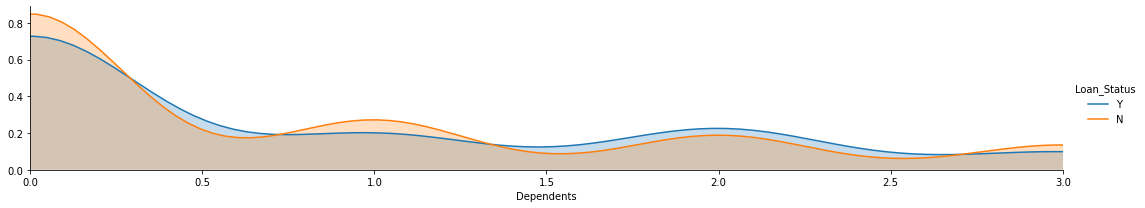

In [10]:
facet = sns.FacetGrid(train, hue = "Loan_Status", aspect = 5)
facet.map(sns.kdeplot,'Dependents',shade= True)
facet.set(xlim=(0, train['Dependents'].max()))
facet.add_legend()

In [11]:
#Education
df.groupby(['Education']).size()
test["Education"] = labelencoder.fit_transform(test["Education"])
train["Education"] = labelencoder.fit_transform(train["Education"])
df["Education"] = labelencoder.fit_transform(df["Education"])



In [12]:
# Self_Employed

df.groupby(['Self_Employed']).size()  # no more comum
df['Self_Employed'].isnull().sum()
test['Self_Employed'].fillna('No', inplace = True)
train['Self_Employed'].fillna('No', inplace = True)
df['Self_Employed'].fillna('No', inplace = True)

In [13]:
test["Self_Employed"] = labelencoder.fit_transform(test["Self_Employed"])
train["Self_Employed"] = labelencoder.fit_transform(train["Self_Employed"])
df["Self_Employed"] = labelencoder.fit_transform(df["Self_Employed"])

In [14]:
#Property_Area
df.groupby(['Property_Area']).size() #Semiurban more comum
test["Property_Area"] = labelencoder.fit_transform(test["Property_Area"])
train["Property_Area"] = labelencoder.fit_transform(train["Property_Area"])
df["Property_Area"] = labelencoder.fit_transform(df["Property_Area"])

In [15]:
#ApplicantIncome
df['ApplicantIncome'].describe()

count      981.000000
mean      5179.795107
std       5695.104533
min          0.000000
25%       2875.000000
50%       3800.000000
75%       5516.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

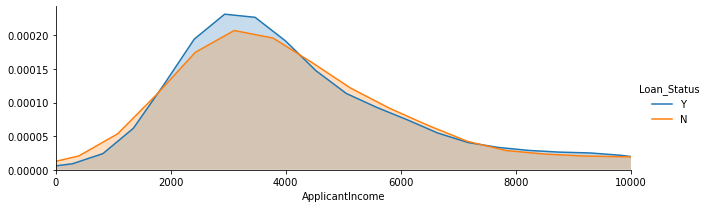

In [16]:
facet2 = sns.FacetGrid(df, hue = "Loan_Status", aspect = 3)
facet2.map(sns.kdeplot,'ApplicantIncome',shade= True)
facet2.set(xlim=(0, 10000))
facet2.add_legend()

In [17]:
df['ApplicantIncome'].describe()



count      981.000000
mean      5179.795107
std       5695.104533
min          0.000000
25%       2875.000000
50%       3800.000000
75%       5516.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [18]:
##### creating sub groups
bin_labels = ['a', 'b', 'c', 'd', 'f','g']
df['ApplicantIncome_5'] = pd.qcut(df['ApplicantIncome'],
                              q=[0,.15,.3,.45,.6,.75,1],
                              labels=bin_labels)

test['ApplicantIncome_5'] = pd.qcut(test['ApplicantIncome'],
                              q=[0,.15,.3,.45,.6,.75,1],
                              labels=bin_labels)

train['ApplicantIncome_5'] = pd.qcut(train['ApplicantIncome'],
                              q=[0,.15,.3,.45,.6,.75,1],
                              labels=bin_labels)

train = train.drop(['ApplicantIncome'], axis = 1)
test = test.drop(['ApplicantIncome'], axis = 1)
df = df.drop(['ApplicantIncome'], axis = 1)

In [19]:
df['ApplicantIncome_5'].isnull().sum()

test["ApplicantIncome_5"] = labelencoder.fit_transform(test["ApplicantIncome_5"])
train["ApplicantIncome_5"] = labelencoder.fit_transform(train["ApplicantIncome_5"])
df["ApplicantIncome_5"] = labelencoder.fit_transform(df["ApplicantIncome_5"])


In [20]:
#CoapplicantIncome
df['CoapplicantIncome'].describe()

count      981.000000
mean      1601.916330
std       2718.772806
min          0.000000
25%          0.000000
50%       1110.000000
75%       2365.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [21]:
#dividir tambem

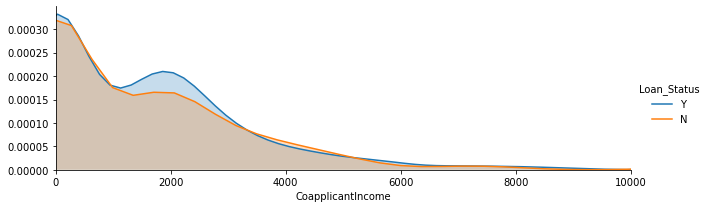

In [22]:
facet3 = sns.FacetGrid(df, hue = "Loan_Status", aspect = 3)
facet3.map(sns.kdeplot,'CoapplicantIncome',shade= True)
facet3.set(xlim=(0, 10000))
facet3.add_legend()

In [23]:
##### creaing sub groups
bin_labels = ['a', 'b', 'c', 'd', 'f','g']
df['CoapplicantIncome6'] = pd.qcut(df['CoapplicantIncome'],
                              q=[0,.5,.65,.70,.80,.9,1],
                              labels=bin_labels)

test['CoapplicantIncome6'] = pd.qcut(test['CoapplicantIncome'],
                              q=[0,.5,.65,.70,.80,.9,1],
                              labels=bin_labels)

train['CoapplicantIncome6'] = pd.qcut(train['CoapplicantIncome'],
                              q=[0,.5,.65,.70,.80,.9,1],
                              labels=bin_labels)

train = train.drop(['CoapplicantIncome'], axis = 1)
test = test.drop(['CoapplicantIncome'], axis = 1)
df = df.drop(['CoapplicantIncome'], axis = 1)

In [24]:
test["CoapplicantIncome6"] = labelencoder.fit_transform(test["CoapplicantIncome6"])
train["CoapplicantIncome6"] = labelencoder.fit_transform(train["CoapplicantIncome6"])
df["CoapplicantIncome6"] = labelencoder.fit_transform(df["CoapplicantIncome6"])


In [25]:
#LoanAmount
df['LoanAmount'].describe()

count    954.000000
mean     142.511530
std       77.421743
min        9.000000
25%      100.000000
50%      126.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [26]:
df['LoanAmount'].isnull().sum()


27

In [27]:
test['LoanAmount'].fillna('142.5', inplace = True)
train['LoanAmount'].fillna('142.5', inplace = True)
df['LoanAmount'].fillna('142.5', inplace = True)

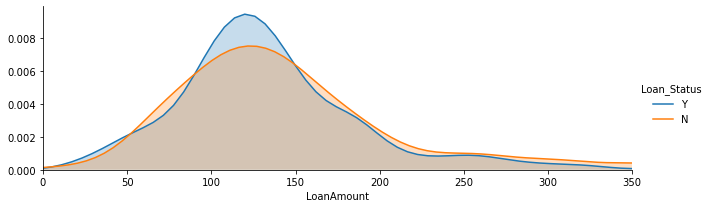

In [28]:
facet4 = sns.FacetGrid(df, hue = "Loan_Status", aspect = 3)
facet4.map(sns.kdeplot,'LoanAmount',shade= True)
facet4.set(xlim=(0, 350))
facet4.add_legend()

In [29]:
df['LoanAmount'] = df['LoanAmount'].astype(str).astype(float)
test['LoanAmount'] = test['LoanAmount'].astype(str).astype(float)
train['LoanAmount'] = train['LoanAmount'].astype(str).astype(float)


In [30]:
##### creaing sub groups

bin_labels = ['a', 'b', 'c', 'd', 'f','g']
df['LoanAmount_6'] = pd.qcut(df['LoanAmount'],
                              q=[0,.25,.40,.50,.65,.75,1],
                              labels=bin_labels)

test['LoanAmount_6'] = pd.qcut(test['LoanAmount'],
                              q=[0,.25,.40,.50,.65,.75,1],
                              labels=bin_labels)

train['LoanAmount_6'] = pd.qcut(train['LoanAmount'],
                              q=[0,.25,.40,.50,.65,.75,1],
                              labels=bin_labels)

train = train.drop(['LoanAmount'], axis = 1)
test = test.drop(['LoanAmount'], axis = 1)
df = df.drop(['LoanAmount'], axis = 1)

In [31]:
test["LoanAmount_6"] = labelencoder.fit_transform(test["LoanAmount_6"])
train["LoanAmount_6"] = labelencoder.fit_transform(train["LoanAmount_6"])
df["LoanAmount_6"] = labelencoder.fit_transform(df["LoanAmount_6"])

In [32]:
#Loan_Amount_Term
df['Loan_Amount_Term'].isnull().sum()

20

In [33]:
test['Loan_Amount_Term'].fillna('342.2', inplace = True)
train['Loan_Amount_Term'].fillna('342.2', inplace = True)
df['Loan_Amount_Term'].fillna('342.2', inplace = True)

In [34]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(str).astype(float)
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype(str).astype(float)
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype(str).astype(float)

In [35]:
df['Loan_Amount_Term'].describe()

count    981.000000
mean     342.201835
std       64.432886
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [36]:
##### creaing sub groups

bin_labels = ['a', 'b', 'c']
df['Loan_Amount_Term_3'] = pd.qcut(df['Loan_Amount_Term'],
                              q=[0,.10,.75,1],
                              labels=bin_labels)

test['Loan_Amount_Term_3'] = pd.qcut(test['Loan_Amount_Term'],
                              q=[0,.10,.75,1],
                              labels=bin_labels)

train['Loan_Amount_Term_3'] = pd.qcut(train['Loan_Amount_Term'],
                              q=[0,.10,.75,1],
                              labels=bin_labels)

train = train.drop(['Loan_Amount_Term'], axis = 1)
test = test.drop(['Loan_Amount_Term'], axis = 1)
df = df.drop(['Loan_Amount_Term'], axis = 1)

In [37]:
test["Loan_Amount_Term_3"] = labelencoder.fit_transform(test["Loan_Amount_Term_3"])
train["Loan_Amount_Term_3"] = labelencoder.fit_transform(train["Loan_Amount_Term_3"])
df["Loan_Amount_Term_3"] = labelencoder.fit_transform(df["Loan_Amount_Term_3"])

In [38]:
#Credit_History
df.groupby(['Credit_History']).size()


Credit_History
0.0    148
1.0    754
dtype: int64

In [39]:
test['Credit_History'].fillna('1', inplace = True)
train['Credit_History'].fillna('1', inplace = True)
df['Credit_History'].fillna('1', inplace = True)

# Split target from data



In [40]:
train_data = train.drop(columns=['Loan_ID','Loan_Status'],axis=1)
train_target = train['Loan_Status']

test_data = test.drop(columns=['Loan_ID'],axis=1)

In [41]:
train_data.shape, train_target.shape

((614, 11), (614,))

In [42]:
train_data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_5,CoapplicantIncome6,LoanAmount_6,Loan_Amount_Term_3
0,1,0,0,0,0,1,2,5,0,3,1
1,1,1,1,0,0,1,0,4,1,2,1
2,1,1,0,0,1,1,2,1,0,0,1
3,1,1,0,1,0,1,2,1,3,2,1
4,1,0,0,0,0,1,2,5,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,1,0,0,1
610,1,1,3,0,0,1,0,3,0,0,0
611,1,1,1,0,0,1,2,5,0,5,1
612,1,1,2,0,0,1,2,5,0,5,1


# ML

In [43]:
# Modelling

In [44]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [45]:
#cross Validation



from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)



In [46]:
# KNN

clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, train_target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# kNN Score
round(np.mean(score)*100, 2)

[0.72580645 0.69354839 0.69354839 0.64516129 0.70491803 0.68852459
 0.75409836 0.70491803 0.68852459 0.62295082]


69.22

In [47]:
# Decision Tree

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, train_target, cv=k_fold, n_jobs=1, scoring=scoring)
# decision tree Score
round(np.mean(score)*100, 2)



69.53

In [48]:
# Naive Baise

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, train_target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# Naive Bayes Score
round(np.mean(score)*100, 2)

[0.87096774 0.79032258 0.80645161 0.83870968 0.81967213 0.81967213
 0.85245902 0.70491803 0.80327869 0.78688525]


80.93

In [49]:
#SVC
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, train_target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.87096774 0.79032258 0.80645161 0.83870968 0.81967213 0.81967213
 0.85245902 0.70491803 0.80327869 0.75409836]


80.61

In [50]:
#RF
clf = RandomForestClassifier(n_estimators=1000)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, train_target, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

77.51

In [51]:
# Naive Baise Product

naive_bayes = GaussianNB()
naive_bayes.fit(train_data, train_target)

GaussianNB()

In [52]:
prediction = naive_bayes.predict(test_data)

In [53]:
submission1 = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Loan_Status": prediction
    })

submission1.to_csv('submission1.csv', index=False)

In [54]:
submission1.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [55]:
#Logistic
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train_data,train_target)

LogisticRegression()

In [56]:
predict = clf.predict(test_data)

In [57]:
submission2 = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Loan_Status": predict
    })

submission2.to_csv('submission2.csv', index=False)

In [58]:
submission2.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [59]:
clf2 = SVC()
clf2.fit(train_data, train_target)

SVC()

In [60]:
predict = clf2.predict(test_data)

In [61]:
submission3 = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Loan_Status": predict
    })

submission3.to_csv('submission3.csv', index=False)

In [62]:
submission3.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
